<h2>Part 1: Data Exploration and Preparation</h2>
<h3>Task 1.1: Data Loading and Initial Exploration</h3>
<p>Load the Boston Housing dataset and perform initial exploratory data analysis.</p>

<p>1.1 What are the dimensions of the dataset (number of observations and variables)?</p>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
# Load the dataset
df = pd.read_csv('../datasets/BostonHousing.csv')

print("=" * 60)
print("BOSTON HOUSING DATASET ANALYSIS")
print("=" * 60)

# 1.1 Dataset Dimensions
print("\n1.1 DATASET DIMENSIONS")
print("-" * 30)
rows, cols = df.shape
print(f"Number of observations (rows): {rows}")
print(f"Number of variables (columns): {cols}")
print(f"Dataset shape: {df.shape}")

# Display column names to understand the dataset structure
print(f"\nColumn names: {list(df.columns)}")


BOSTON HOUSING DATASET ANALYSIS

1.1 DATASET DIMENSIONS
------------------------------
Number of observations (rows): 506
Number of variables (columns): 14
Dataset shape: (506, 14)

Column names: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']


<p>1.2 Provide descriptive statistics for the target variable (medv) and primary feature (lstat).</p>

In [9]:
# 1.2 Descriptive Statistics
print("\n1.2 DESCRIPTIVE STATISTICS")
print("-" * 30)

print("\nDescriptive statistics for TARGET VARIABLE (medv):")
print(df['medv'].describe())

print("\nDescriptive statistics for PRIMARY FEATURE (lstat):")
print(df['lstat'].describe())

# Additional statistics
print(f"\nAdditional statistics for medv:")
print(f"Variance: {df['medv'].var():.4f}")
print(f"Standard deviation: {df['medv'].std():.4f}")
print(f"Skewness: {df['medv'].skew():.4f}")
print(f"Kurtosis: {df['medv'].kurtosis():.4f}")

print(f"\nAdditional statistics for lstat:")
print(f"Variance: {df['lstat'].var():.4f}")
print(f"Standard deviation: {df['lstat'].std():.4f}")
print(f"Skewness: {df['lstat'].skew():.4f}")
print(f"Kurtosis: {df['lstat'].kurtosis():.4f}")



1.2 DESCRIPTIVE STATISTICS
------------------------------

Descriptive statistics for TARGET VARIABLE (medv):
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

Descriptive statistics for PRIMARY FEATURE (lstat):
count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

Additional statistics for medv:
Variance: 84.5867
Standard deviation: 9.1971
Skewness: 1.1081
Kurtosis: 1.4952

Additional statistics for lstat:
Variance: 50.9948
Standard deviation: 7.1411
Skewness: 0.9065
Kurtosis: 0.4932


<p>1.3 What is the correlation coefficient between medv and lstat? Interpret this value.</p>

In [10]:
# 1.3 Correlation Coefficient
print("\n1.3 CORRELATION ANALYSIS")
print("-" * 30)
correlation = df['medv'].corr(df['lstat'])
print(f"Correlation coefficient between medv and lstat: {correlation:.4f}")

# Interpretation
print(f"\nINTERPRETA1TION:")
if abs(correlation) >= 0.7:
    strength = "strong"
elif abs(correlation) >= 0.5:
    strength = "moderate to strong"
elif abs(correlation) >= 0.3:
    strength = "moderate"
else:
    strength = "weak"

direction = "negative" if correlation < 0 else "positive"
print(f"- The correlation coefficient of {correlation:.4f} indicates a {strength} {direction} relationship")
print(f"- This means that as lstat (% lower status population) increases, medv (median home value) tends to {'decrease' if correlation < 0 else 'increase'}")
print(f"- The relationship explains approximately {(correlation**2)*100:.1f}% of the variance (R² = {correlation**2:.4f})")

# Statistical significance test
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(df['medv'], df['lstat'])
print(f"- Statistical significance: p-value = {p_value:.2e}")
print(f"- The correlation is {'statistically significant' if p_value < 0.05 else 'not statistically significant'} at α = 0.05")




1.3 CORRELATION ANALYSIS
------------------------------
Correlation coefficient between medv and lstat: -0.7377

INTERPRETA1TION:
- The correlation coefficient of -0.7377 indicates a strong negative relationship
- This means that as lstat (% lower status population) increases, medv (median home value) tends to decrease
- The relationship explains approximately 54.4% of the variance (R² = 0.5441)
- Statistical significance: p-value = 5.08e-88
- The correlation is statistically significant at α = 0.05


<p>1.4 Create a scatter plot showing the relationship between lstat (x-axis) and medv (y-axis).
Describe the pattern you observe.</p>


1.4 SCATTER PLOT ANALYSIS
------------------------------


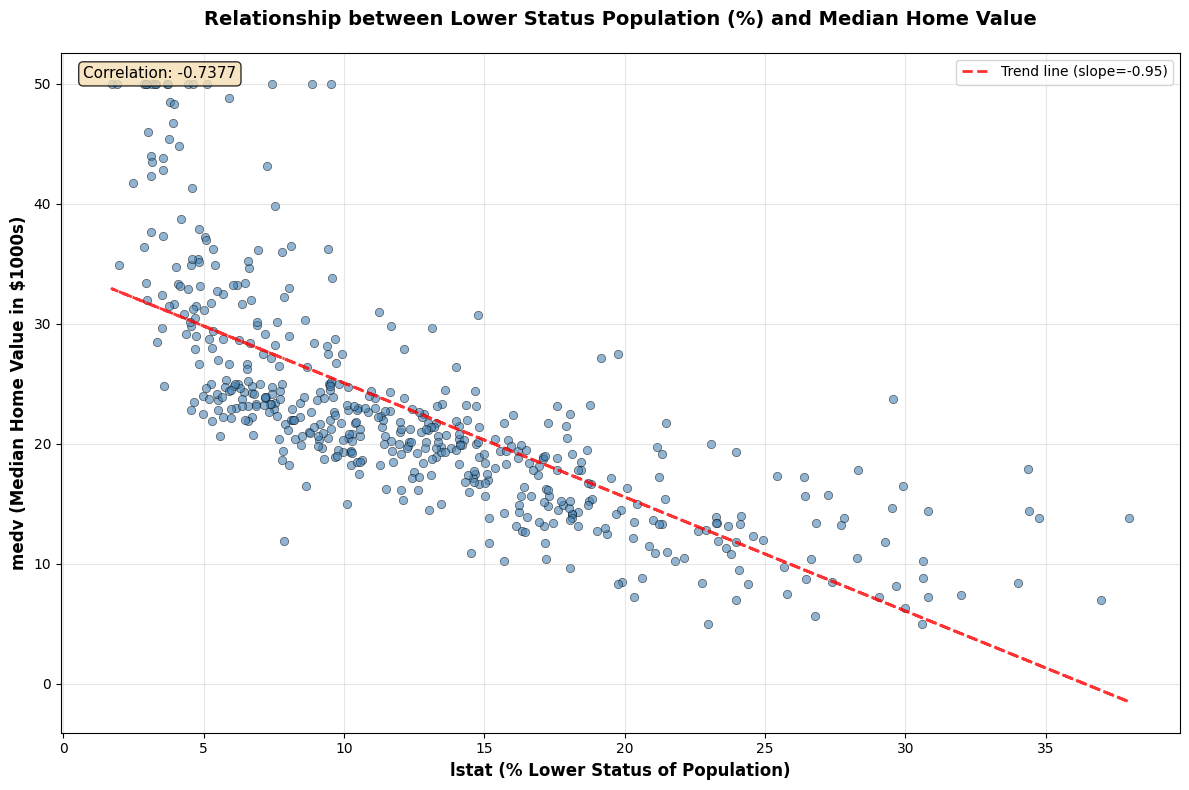

PATTERN OBSERVED IN SCATTER PLOT:
- The scatter plot reveals a clear negative relationship between lstat and medv
- As the percentage of lower status population increases, median home values tend to decrease
- The relationship appears to be non-linear, showing a curved pattern rather than a straight line
- There's more variability in home values at lower lstat percentages
- The relationship seems stronger (steeper decline) at lower lstat values and levels off at higher lstat values
- There are some potential outliers, particularly homes with high values despite higher lstat percentages
- The data points form a characteristic negative exponential or power-law pattern


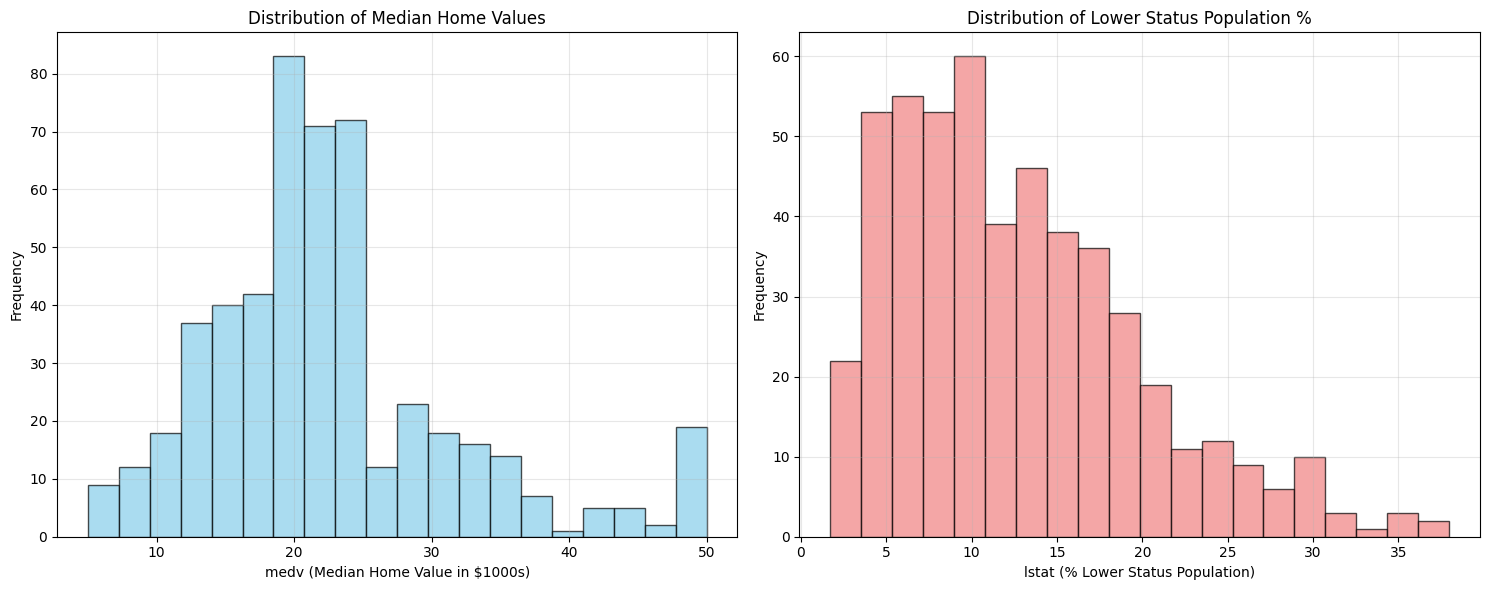


SUMMARY:
- Dataset contains 506 observations and 14 variables
- Strong negative correlation (-0.7377) between lstat and medv
- Non-linear relationship visible in scatter plot
- Both variables show reasonable distributions for regression analysis


In [11]:
# 1.4 Scatter Plot
print("\n1.4 SCATTER PLOT ANALYSIS")
print("-" * 30)

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df['lstat'], df['medv'], alpha=0.6, color='steelblue', edgecolors='black', linewidth=0.5)

# Add trend line
z = np.polyfit(df['lstat'], df['medv'], 1)
p = np.poly1d(z)
plt.plot(df['lstat'], p(df['lstat']), "r--", alpha=0.8, linewidth=2, label=f'Trend line (slope={z[0]:.2f})')

# Formatting
plt.xlabel('lstat (% Lower Status of Population)', fontsize=12, fontweight='bold')
plt.ylabel('medv (Median Home Value in $1000s)', fontsize=12, fontweight='bold')
plt.title('Relationship between Lower Status Population (%) and Median Home Value', fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)
plt.legend()

# Add correlation info to plot
plt.text(0.02, 0.98, f'Correlation: {correlation:.4f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8), fontsize=11, verticalalignment='top')

plt.tight_layout()
plt.show()

# Pattern description
print("PATTERN OBSERVED IN SCATTER PLOT:")
print("- The scatter plot reveals a clear negative relationship between lstat and medv")
print("- As the percentage of lower status population increases, median home values tend to decrease")
print("- The relationship appears to be non-linear, showing a curved pattern rather than a straight line")
print("- There's more variability in home values at lower lstat percentages")
print("- The relationship seems stronger (steeper decline) at lower lstat values and levels off at higher lstat values")
print("- There are some potential outliers, particularly homes with high values despite higher lstat percentages")
print("- The data points form a characteristic negative exponential or power-law pattern")

# Additional visualization - distribution plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Distribution of medv
ax1.hist(df['medv'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('medv (Median Home Value in $1000s)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Median Home Values')
ax1.grid(True, alpha=0.3)

# Distribution of lstat
ax2.hist(df['lstat'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel('lstat (% Lower Status Population)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Lower Status Population %')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nSUMMARY:")
print(f"- Dataset contains {rows} observations and {cols} variables")
print(f"- Strong negative correlation ({correlation:.4f}) between lstat and medv")
print(f"- Non-linear relationship visible in scatter plot")
print(f"- Both variables show reasonable distributions for regression analysis")

<h2>Part 2: Linear Regression Model Fitting</h2>
<h3>Task 2.1: Model Estimation</h3>
<p>Fit a simple linear regression model using lstat to predict medv using statsmodels.</p>

<p>2.1 Write the estimated regression equation in the form:</p>

$\text{medv} = \hat{\beta}_0 + \hat{\beta}_1 \times \text{lstat}$

$$
\text{medv} = \hat{\beta}_0 + \hat{\beta}_1 \times \text{lstat}
$$

In [12]:
# todo 

<p>2.2 What is the interpretation of the intercept in the context of this problem? Does it have practical meaning?</p>

$\hat{\beta}_0$

In [13]:
# todo 

<p>2.3 What is the interpretation of the slope? Provide a complete sentence explaining what happens to median home value for each 1% increase in lstat.</p>

$\hat{\beta}_1$

In [14]:
# todo

<p>2.4 Based on the 95% confidence intervals for the coefficients, are both the intercept and slope significantly different from zero? Support your answer with the confidence interval values.</p>

<h3>Task 2.2: Model Performance Evaluation</h3>
<p>Evaluate the overall performance and significance of your regression model.</p>

<p>2.5 What is the R-squared value? Interpret this in terms of the percentage of variation in median home values explained by the percentage of lower status population.</p>

In [15]:
# todo

<p>2.6 What is the Root Mean Square Error (RMSE)? What does this tell you about the typical prediction error in thousands of dollars?</p>

In [16]:
# todo 

<p>2.7 Report the F-statistic and its p-value. What does this test tell you about the overall significance of your model</p>

In [17]:
# todo 

2.8 Compare the adjusted R-squared with the regular R-squared. Why might there be a difference, and what does the adjusted version account for?

In [18]:
# todo

<h2> Part 3: Statistical Inference and Hypothesis Testing</h2>
<h3>Task 3.1: Coefficient Significance Testing</h3>
<p>Conduct hypothesis tests for the regression coefficients.</p>

<p>3.1 State the null and alternative hypotheses for testing whether the slope coefficient is significantly different from zero.</p>

In [19]:
# todo

<p>3.2 Report the t-statistic and p-value for the slope coefficient. What is your conclusion at the 5% significance level?</p>

In [20]:
# todo

<p>3.3 Calculate and interpret the 99% confidence interval for the slope coefficient. How does this compare to the 95% interval in terms of width and interpretation?</p>

In [21]:
# todo

<p>3.4 If someone claimed that each 1% increase in lstat decreases median home value by exactly $1000, would your regression results support or contradict this claim? Justify your answer using statistical evidence.</p>

In [22]:
# todo

<h2>Part 4: Assumption Testing and Model Diagnostics</h2>
<h3>Task 4.1: Normality of Residuals</h3>
<p>Test whether the residuals follow a normal distribution.</p>

<p>4.1 Perform the Shapiro-Wilk test for normality of residuals. Report the test statistic, p-value, and your conclusion at the 5% significance level.</p>

In [23]:
# todo

<p>4.2 Create a Q-Q plot of the residuals. Does the visual evidence support or contradict your statistical test result? Explain what you observe.</p>

In [24]:
# todo

<p>4.3 Create a histogram of residuals with a normal distribution overlay. Comment on the shape of the distribution and any departures from normality.</p>

In [25]:
# todo

<h3>Task 4.2: Homoscedasticity Testing</h3>
<p>Test whether the variance of residuals is constant across all fitted values.</p>

In [26]:
# todo

<p>4.4 Perform the Breusch-Pagan test for homoscedasticity. Report the test statistic, p-value, and your conclusion.</p>

In [27]:
# todo

<p>4.5 Create a residuals vs. fitted values plot. What pattern would indicate heteroscedasticity? Do you observe this pattern in your plot?</p>

In [28]:
# todo

<p>4.6 Create a scale-location plot (square root of absolute residuals vs. fitted values). Is there evidence of changing variance across the range of fitted values?</p>

In [29]:
# todo

<h3>Task 4.3: Independence and Influence Diagnostics</h3>
<p>Test for independence and identify influential observations.</p>

<p>4.7 Calculate the Durbin-Watson statistic. What does this value indicate about the independence of residuals?</p>

In [30]:
# todo

<p>4.8 Calculate Cook’s distance for all observations. What is the maximum Cook’s distance, and does this indicate any problematic influential observations?</p>

In [31]:
# todo

<p>4.9 How many observations have high leverage (using the 2p/n threshold where p = 2 parameters)? What percentage of the total sample does this represent?</p>

In [32]:
# todo

<p>4.10 Based on all assumption tests, is your linear regression model valid for statistical inference? Summarize which assumptions are satisfied and which (if any) are violated.</p>

In [33]:
# todo

<h2> Part 5: Predictions and Intervals</h2>
<h3>Task 5.1: Making Predictions</h3>
<p>Use your model to make predictions with uncertainty quantification.</p>

<p>5.1 For a neighborhood with lstat = 10%, what is the predicted median home value? Show the calculation.</p>

In [34]:
# todo

<p>5.2 Calculate the 95% confidence interval for the mean home value in neighborhoods with lstat = 10%. Interpret this interval.</p>

In [35]:
# todo

<p>5.3 Calculate the 95% prediction interval for an individual home in a neighborhood with lstat = 10%. How does this compare to the confidence interval in terms of width?</p>

In [36]:
# todo

<p>5.4 Explain the difference between a confidence interval and a prediction interval in practical terms. When would you use each type?</p>

In [37]:
# todo

<p>5.5 For lstat values of 5%, 15%, and 25%, calculate point predictions and comment on how the relationship changes across different levels of the predictor variable</p>

In [38]:
# todo